In [26]:
import numpy as np 
import pandas as pd

In [27]:
data = pd.read_csv('train.csv')

In [28]:
data.head()

,case_id,equipment_id,completion_date,action_recommendation_id,action_recommendation_type,action_recommendation_category,equipment_area,usage_type,speed_category,load_category,floors_category,equipment_category,feedback
0,b7c775ad-4ebe-4848-9c53-37e7c5658e21,ele0000754,2018-10-03,ar00000174,art01,arc03,ga00000803,ut012,7,6,8,tp006,1
1,b177eefd-3946-4949-9699-0a91879350f9,ele0000789,2018-10-03,ar00000248,art02,arc03,ga00000269,ut005,4,6,2,tp001,1
2,fc2d568a-c53c-43ef-8871-a49ec22ab3b1,ele0001227,2018-10-03,ar00000158,art02,arc03,ga00000064,ut011,6,6,7,tp006,1
3,8e645922-1268-4c6b-ae6b-7b1605689cca,ele0001754,2018-10-03,ar00000105,art01,arc03,ga00000662,ut005,8,7,8,tp014,1
4,b44f10b1-9238-44db-8f0c-2d68e8c015a7,ele0002087,2018-10-03,ar00000148,art02,arc03,ga00001256,ut011,7,6,8,tp013,1


In [29]:
from sklearn.preprocessing import OrdinalEncoder
ord_enc = OrdinalEncoder()
data["case_id"] = ord_enc.fit_transform(data[["case_id"]])
data["equipment_id"] = ord_enc.fit_transform(data[["equipment_id"]])
data["completion_date"] = ord_enc.fit_transform(data[["completion_date"]])
data["action_recommendation_id"] = ord_enc.fit_transform(data[["action_recommendation_id"]])
data["action_recommendation_type"] = ord_enc.fit_transform(data[["action_recommendation_type"]])
data["action_recommendation_category"] = ord_enc.fit_transform(data[["action_recommendation_category"]])
data["equipment_area"] = ord_enc.fit_transform(data[["equipment_area"]])
data["usage_type"] = ord_enc.fit_transform(data[["usage_type"]])
data["equipment_category"] = ord_enc.fit_transform(data[["equipment_category"]])

In [30]:
y = data['feedback']
X = data.drop('feedback',axis=1)

In [31]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.4,stratify=y)

In [32]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
grid_params = {
    'n_neighbors' : [3,5,7,9,11],
    'metric' : ['euclidean','manhattan']
}
gs = GridSearchCV(
    KNeighborsClassifier(),
    grid_params,
    cv=3
)
gs_results = gs.fit(X_train,y_train)

In [33]:
gs_results.best_params_

{'metric': 'manhattan', 'n_neighbors': 11}

In [34]:
knn = KNeighborsClassifier(n_neighbors=3,metric='manhattan')
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
print(knn.score(X_test, y_test))

0.8511366096557696


In [35]:
from sklearn.metrics import precision_score,recall_score
print('p=',precision_score(y_test,y_pred))
print('r=',recall_score(y_test,y_pred))

p= 0.8886400369429693
r= 0.9493586581154415


In [36]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[  827,  4823],
       [ 2053, 38487]], dtype=int64)

In [37]:
datatest = pd.read_csv('test.csv')

In [38]:
datatest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29428 entries, 0 to 29427
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   case_id                         29428 non-null  object
 1   equipment_id                    29428 non-null  object
 2   completion_date                 29428 non-null  object
 3   action_recommendation_id        29427 non-null  object
 4   action_recommendation_type      29428 non-null  object
 5   action_recommendation_category  29428 non-null  object
 6   equipment_area                  29345 non-null  object
 7   usage_type                      29428 non-null  object
 8   speed_category                  29428 non-null  int64 
 9   load_category                   29428 non-null  int64 
 10  floors_category                 29428 non-null  int64 
 11  equipment_category              29428 non-null  object
dtypes: int64(3), object(9)
memory usage: 2.7+ MB


In [39]:
datatest['equipment_area'].fillna(datatest['equipment_area'].mode()[0],inplace=True)

In [40]:
datatest['action_recommendation_id'].fillna(datatest['equipment_area'].mode()[0],inplace=True)

In [41]:
from sklearn.preprocessing import OrdinalEncoder
ord_enc = OrdinalEncoder()
datatest["case_id"] = ord_enc.fit_transform(datatest[["case_id"]])
datatest["equipment_id"] = ord_enc.fit_transform(datatest[["equipment_id"]])
datatest["completion_date"] = ord_enc.fit_transform(datatest[["completion_date"]])
datatest["action_recommendation_id"] = ord_enc.fit_transform(datatest[["action_recommendation_id"]])
datatest["action_recommendation_type"] = ord_enc.fit_transform(datatest[["action_recommendation_type"]])
datatest["action_recommendation_category"] = ord_enc.fit_transform(datatest[["action_recommendation_category"]])
datatest["equipment_area"] = ord_enc.fit_transform(datatest[["equipment_area"]])
datatest["usage_type"] = ord_enc.fit_transform(datatest[["usage_type"]])
datatest["equipment_category"] = ord_enc.fit_transform(datatest[["equipment_category"]])

In [42]:
datatest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29428 entries, 0 to 29427
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   case_id                         29428 non-null  float64
 1   equipment_id                    29428 non-null  float64
 2   completion_date                 29428 non-null  float64
 3   action_recommendation_id        29428 non-null  float64
 4   action_recommendation_type      29428 non-null  float64
 5   action_recommendation_category  29428 non-null  float64
 6   equipment_area                  29428 non-null  float64
 7   usage_type                      29428 non-null  float64
 8   speed_category                  29428 non-null  int64  
 9   load_category                   29428 non-null  int64  
 10  floors_category                 29428 non-null  int64  
 11  equipment_category              29428 non-null  float64
dtypes: float64(9), int64(3)
memory u

In [43]:
Z=datatest

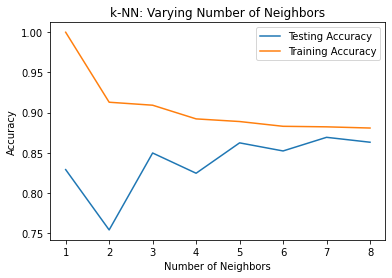

In [44]:
import numpy as np
import matplotlib.pyplot as plt 
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(X_train,y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [45]:
predictions = knn.predict(datatest)

output = pd.DataFrame({'case_id': datatest.case_id,'action_recommendation_id': datatest.action_recommendation_id, 'feedback': predictions})
output.to_csv('my_submission2.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
